# 1. Echauffement

## Question 1.1
- Python manipule les entiers de grande taille naturally, pas besoin d'utiliser une librairie spécifique

## Question 1.2

In [1]:
def decomposition(n):
    return [bit == "1" for bit in reversed(format(n, "b"))]

In [2]:
# Test
decomposition(38)

[False, True, True, False, False, True]

## Question 1.3

In [3]:
def completion(list_bits, n):
    length = len(list_bits)
    if n > length:
        return list_bits + [False] * (n - length)
    else:
        return list_bits[:n]

In [4]:
# Test
completion([False, True, True, False, False, True], 4)

[False, True, True, False]

In [5]:
# Test
completion([False, True, True, False, False, True], 8)

[False, True, True, False, False, True, False, False]

## Question 1.4

In [6]:
def table(x, n):
    return completion(decomposition(x), n)

In [7]:
# Test
table(38, 8)

[False, True, True, False, False, True, False, False]

# 2. Arbre de décision et compression

## Question 2.5

In [8]:
class Node:
    def __init__(self, label, left, right):
        self.label = label 
        self.left = left 
        self.right = right
        self.luka = "" 
    def get_left(self):
        return self.left
    def get_right(self):
        return self.right
    def set_left(self, left):
        self.left = left
    def set_right(self, right):
        self.right = right  
    def get_label(self):
        return self.label
    def set_label(self, label):
        self.label = label
    def set_luka(self, luka_word):
        self.luka = luka_word
    def get_luka(self):
        return self.luka
    def __str__(self):
        # if self.left is None and self.right is None:
        #     return str(self.label)
        # else:
        #     return str(self.label) +  " " + self.left.__str__() + " " + self.right.__str__()
        return str(self.label) +  " Left: (" + self.left.__str__() + ") Right: (" + self.right.__str__() + ")"

## Question 2.6

In [9]:
import math
import random

def traverse_tree(tree, list_vars, truth_table, count):
    if count != len(list_vars) - 1:
        if tree is None:
            tree = Node(list_vars[count], None, None)
            
        left = traverse_tree(None, list_vars, truth_table, count+1)
        right = traverse_tree(None, list_vars, truth_table, count+1)
        tree.set_left(left)
        tree.set_right(right)
        return tree
    else:
        value1 = truth_table.pop(0)
        value2 = truth_table.pop(0)
        return Node(list_vars[count], Node(value1, None, None), Node(value2, None, None))

def cons_arbre(truth_table):
    nb_vars = math.log2(len(truth_table))
    if nb_vars - int(nb_vars) != 0:
        return None

    list_vars = [x for x in range(1, int(nb_vars)+1)]
    random.shuffle(list_vars)
    return traverse_tree(None, list_vars, truth_table, 0)
            

In [10]:
# Test
# Decision tree issu de la table de vérité de taille 8 construite sur l'entier 38
tree1 = cons_arbre(table(38, 8))
print(tree1)

1 Left: (2 Left: (3 Left: (False Left: (None) Right: (None)) Right: (True Left: (None) Right: (None))) Right: (3 Left: (True Left: (None) Right: (None)) Right: (False Left: (None) Right: (None)))) Right: (2 Left: (3 Left: (False Left: (None) Right: (None)) Right: (True Left: (None) Right: (None))) Right: (3 Left: (False Left: (None) Right: (None)) Right: (False Left: (None) Right: (None))))


## Question 2.7

In [11]:
def luka(tree):
    if tree is None:
        return
    if tree.get_left() is None and tree.get_right() is None:
        new_luka_word = str(tree.get_label())
        tree.set_luka(new_luka_word)
    else:
        luka(tree.get_left())
        luka(tree.get_right())
        new_luka_word = str(tree.get_label())
        left = tree.get_left()
        right = tree.get_right()
        if left is not None:
            new_luka_word += "(" + left.get_luka() + ")"
        if right is not None:
            new_luka_word += "(" + right.get_luka() + ")"
        tree.set_luka(new_luka_word)

## Question 2.8

In [12]:
def build_compact_tree(graph, luka_tree):
    pass

def compression(luka_tree, seen=dict()):
    if luka_tree is None:
        return None
    luka_word = luka_tree.get_luka()
    if luka_word in seen:
        return seen[luka_word]
    else:
        seen[luka_word] = luka_tree
        # print(seen)
        compact_tree = luka_tree
        # print(f"Id tree: {hex(id(compact_tree))}")
        left = compression(luka_tree.get_left(), seen)
        # print(f"Id left: {hex(id(left))}")
        compact_tree.set_left(left)
        # print(f"Id left tree: {hex(id(compact_tree.get_left()))}")
        # compact_tree.set_right = compression(luka_tree.get_right())
        right = compression(luka_tree.get_right(), seen)
        # print(f"Id right: {hex(id(right))}")
        compact_tree.set_right(right)
        # print(f"Id right tree: {hex(id(compact_tree.get_right()))}")
        return compact_tree

## Question 2.9

In [13]:
import graphviz as gv
import copy
from IPython.display import Image

def have_edge(g, v1, v2, is_dashed):
    if is_dashed:
        return "\t" + str(v1) + " -- " + str(v2) + " [style=dashed]" in g.body
    else:
        return "\t" + str(v1) + " -- " + str(v2) in g.body

def have_node(g, id, label):
    return "\t" + id + " [label=" + label + "]" in g.body

def build(graph, tree, previous_node_id=None, decision_tree=True, is_dashed=True):
    if tree is None:
        return
    new_node_label = str(tree.get_label())
    new_node_id = str(id(tree))
    if not have_node(graph, new_node_id, new_node_label):
        graph.node(new_node_id, new_node_label)
    if previous_node_id is not None:
        if decision_tree and is_dashed:
            if not have_edge(graph, previous_node_id, new_node_id, True):
                graph.edge(previous_node_id, new_node_id, style="dashed")
        else:
            if not have_edge(graph, previous_node_id, new_node_id, False):
                graph.edge(previous_node_id, new_node_id)

    build(graph, tree.get_left(), new_node_id)
    build(graph, tree.get_right(), new_node_id, is_dashed=False)

def dot(tree, name="graph", directory="graph_image", decision_tree=True):
    g = gv.Graph(name)
    g.format = "png"
    temp_tree = copy.copy(tree)

    build(g, temp_tree, decision_tree=decision_tree)
    # print(g.body)
    g.render(directory=directory)

- Image de l'arbre de décision issu de table de vérité de taille 8 construite sur l'entier 38

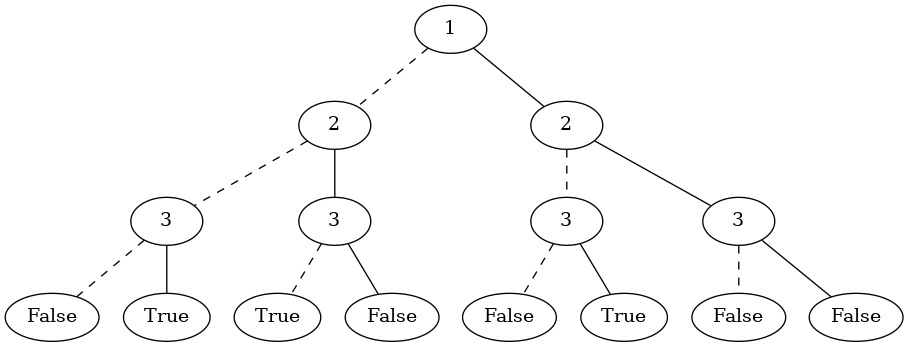

In [14]:
# Test
dot(tree1, "decision_tree_1")
Image("graph_image/decision_tree_1.gv.png")

- Le mot de Lukasiewicz associé à l'arbre ci-dessus

In [15]:
luka(tree1)
print(tree1.get_luka())

1(2(3(False)(True))(3(True)(False)))(2(3(False)(True))(3(False)(False)))


- Image de l'arbre de décision issu de la table de vérité de taille 16 construite sur l'entier 57

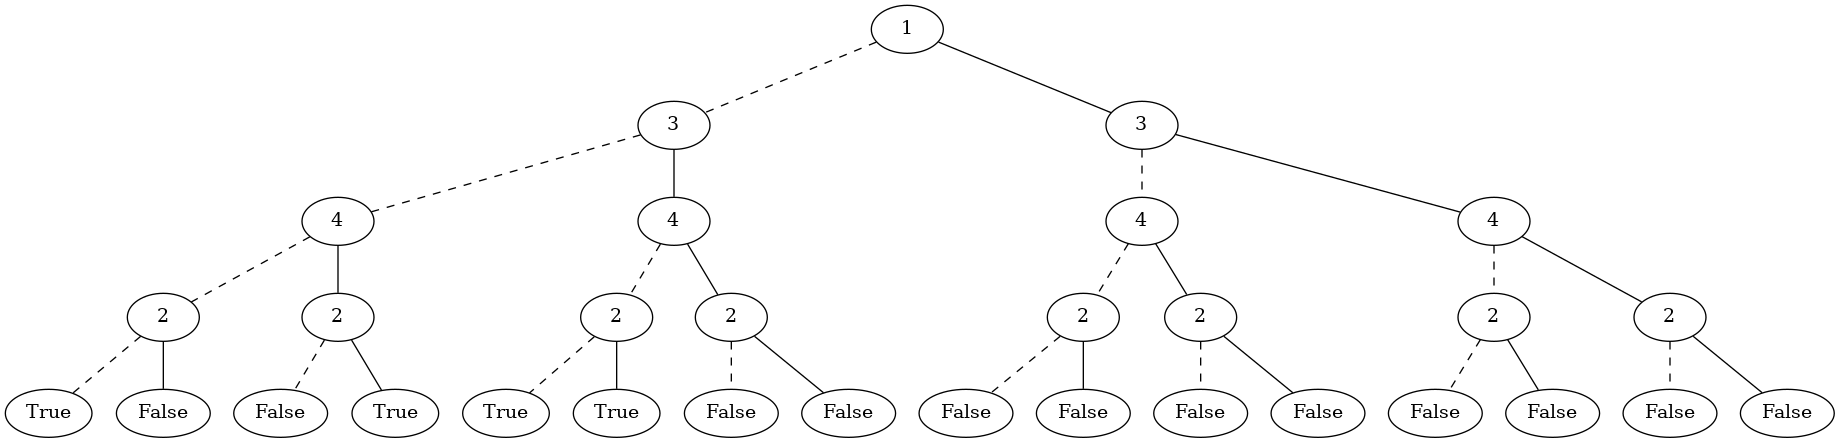

In [16]:
# Test
tree2 = cons_arbre(table(57, 16))
dot(tree2, "decision_tree_2")
Image("graph_image/decision_tree_2.gv.png")

- Le mot de Lukasiewicz associé à l'arbre ci-dessus

In [17]:
luka(tree2)
print(tree2.get_luka())

1(3(4(2(True)(False))(2(False)(True)))(4(2(True)(True))(2(False)(False))))(3(4(2(False)(False))(2(False)(False)))(4(2(False)(False))(2(False)(False))))


- DAG obtenu par compression du premier l'arbre de décision ci-dessus

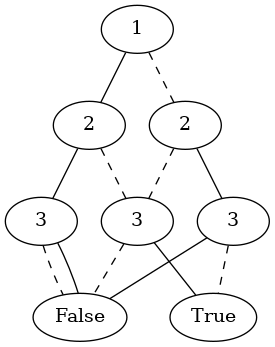

In [18]:
import copy
compressed_tree_1 = compression(copy.deepcopy(tree1))
dot(compressed_tree_1, "compressed_tree_1")
Image("graph_image/compressed_tree_1.gv.png")

- DAG obtenu par compression du deuxième l'arbre de décision ci-dessus

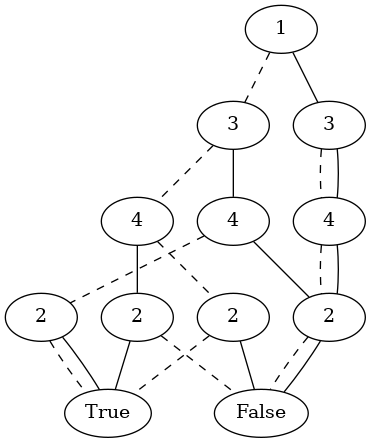

In [19]:
compressed_tree_2 = compression(copy.deepcopy(tree2))
dot(compressed_tree_2, "compressed_tree_2")
Image("graph_image/compressed_tree_2.gv.png")

## Question 3.10


In [20]:
def compression_bdd(luka_tree, seen=dict()):
    if luka_tree is None:
        return None
    
    # Deletion rule
    left, right = luka_tree.get_left(), luka_tree.get_right()
    if left is not None and right is not None:
        left_luka_word, right_luka_word = left.get_luka(), right.get_luka()
        if left_luka_word == right_luka_word:
            if left_luka_word in seen:
                return seen[left_luka_word]
            else:
                # seen[left_luka_word] = left
                new_left = compression_bdd(left, seen)
                seen[luka_tree.get_luka()] = new_left
                return new_left

    # Termination rule and merging rule
    luka_word = luka_tree.get_luka()
    if luka_word in seen:
        return seen[luka_word]
    else:
        seen[luka_word] = luka_tree
        compact_tree = luka_tree
        # print(f"Luka word: {compact_tree.get_luka()}")
        # print(f"Id tree: {hex(id(compact_tree))}")
        new_left = compression_bdd(luka_tree.get_left(), seen)
        # print(f"Id left: {hex(id(new_left))}")
        compact_tree.set_left(new_left)
        # print(f"Id left tree: {hex(id(compact_tree.get_left()))}")
        new_right = compression_bdd(luka_tree.get_right(), seen)
        # print(f"Id right: {hex(id(new_right))}")
        compact_tree.set_right(new_right)
        # print(f"Id right tree: {hex(id(compact_tree.get_right()))}")

        return compact_tree

- ROBDD associé au premier arbre de décision ci-dessus

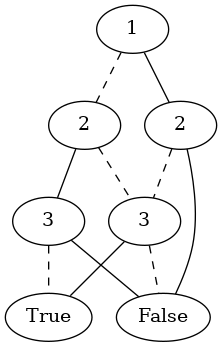

In [21]:
compressed_bdd_tree_1 = compression_bdd(copy.deepcopy(tree1))
dot(compressed_bdd_tree_1, "compressed_bdd_tree_1")
Image("graph_image/compressed_bdd_tree_1.gv.png")

- ROBDD associé au deuxième arbre de décision ci-dessus

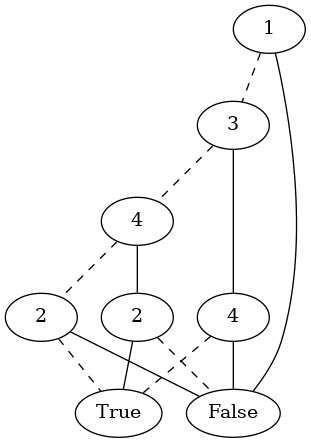

In [22]:
compressed_bdd_tree_2 = compression_bdd(copy.deepcopy(tree2))
dot(compressed_bdd_tree_2, "compressed_bdd_tree_2")
Image("graph_image/compressed_bdd_tree_2.gv.png")

- ROBDD et DAG associé au l'arbre de décision issu de la table de vérité de taille 64 construite sur l'entier 8173891789

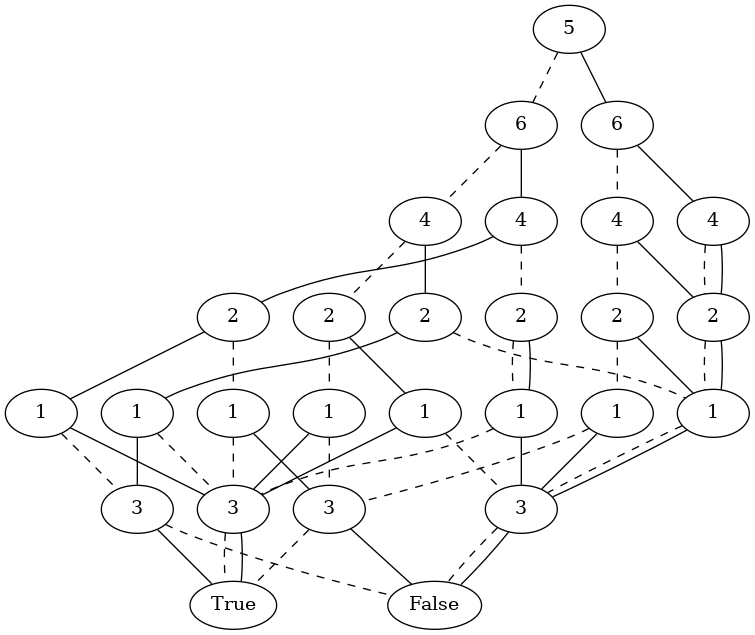

In [23]:
tree3 = cons_arbre(table(8173891789, 64))
luka(tree3)
compressed_tree_3 = compression(copy.deepcopy(tree3))
compressed_bdd_tree3 = compression_bdd(copy.deepcopy(tree3))
dot(compressed_tree_3, "compressed_tree_3")
dot(compressed_bdd_tree3, "compressed_bdd_tree_3")
Image("graph_image/compressed_tree_3.gv.png")


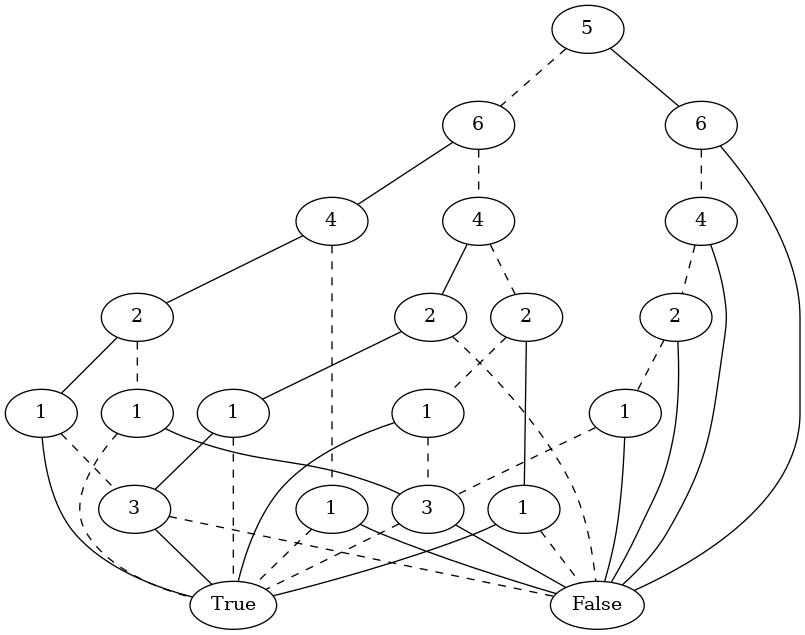

In [24]:
Image("graph_image/compressed_bdd_tree_3.gv.png")

In [25]:
import time
# compressed_tree_test = compression(copy.deepcopy(tree3))
tree3 = cons_arbre(table(817, 32))
luka(tree3)
t = time.time()
compressed_bdd_tree3 = compression_bdd(copy.deepcopy(tree3))
t = time.time() - t
# dot(compressed_tree_3, "compressed_tree_3")
# dot(compressed_bdd_tree3, "compressed_bdd_tree_3")
# Image("graph_image/compressed_tree_3.gv.png")
print(t)

0.0029151439666748047


In [26]:
2 ** (2**4)

65536

In [28]:
for i in range(2 ** (2**5)):
    tree = cons_arbre(table(i, 2**5))
    luka(tree)
    compression_bdd(cons_arbre(table(i, 2 ** 4)))